### Домашняя работа

Для одной из промежуточных ступеней паровой турбины построить графически треугольники скоростей для 10 сечений равномерно распределенных по высоте при следующих исходных данных

In [1]:
import iapws
import math
from iapws import IAPWS97 as gas
import matplotlib.pyplot as plt

In [2]:
MPa = 10 ** 6
kPa = 10 ** 3
unit = 1 / MPa
to_kelvin = lambda x: x + 273.15 if x else None

In [44]:
n = 10
p_0 = 16.7 * MPa
t_0 = to_kelvin(520)
p_2 = 14.5 * MPa
avg_diameter = 0.892
diametr = [0.8]
degree_of_reaction_avg = 0.2
alpha_1_deg_avg = 13
delta_beta_deg = 5
fi = 0.97
psi = 0.935
rotation_speed = 50
d_per = avg_diameter*2 - diametr[0]
step = ((d_per-diametr[0])/(n-1))
for i in range(9) :  
    diametr.append(round((diametr[-1]+step),4))

In [45]:
def heat_drop(p_0,t_0,p_2,degree_of_reaction):
    inlet_point = gas(P=p_0 * unit, T=t_0)
    outlet_point = gas(P=p_2 * unit, s=inlet_point.s)
    theoretical_heat_drop = inlet_point.h - outlet_point.h
    stator_heat_drop = theoretical_heat_drop * (1 - degree_of_reaction) 
    rotor_heat_drop = theoretical_heat_drop * degree_of_reaction
    return inlet_point, outlet_point, theoretical_heat_drop, stator_heat_drop, rotor_heat_drop

In [46]:
def speed (stator_heat_drop,avg_diameter):
    c_1t = (2 * 1000 * stator_heat_drop) ** 0.5
    c_1 = c_1t * fi
    u = math.pi * avg_diameter * rotation_speed
    sin_alpha_1 = math.sin(math.radians(alpha_1_deg))
    cos_alpha_1 = math.cos(math.radians(alpha_1_deg))
    w_1 = (c_1 ** 2 + u ** 2 - 2 * c_1 * u * cos_alpha_1) ** 0.5
    w_2t = (w_1 ** 2 + 2 * rotor_heat_drop * 1000) ** 0.5
    w_2 = w_2t * psi
    beta_1 = math.atan(sin_alpha_1 / (cos_alpha_1 - u / c_1))
    beta_1_deg = math.degrees(beta_1)
    beta_2_deg = beta_1_deg - delta_beta_deg
    beta_1_deg, beta_2_deg
    sin_beta_2 = math.sin(math.radians(beta_2_deg))
    cos_beta_2 = math.cos(math.radians(beta_2_deg))
    c_2 = (w_2 ** 2 + u ** 2 - 2 * w_2 * u * cos_beta_2) ** 0.5
    return c_1,cos_alpha_1,sin_alpha_1,u,w_2,cos_beta_2,sin_beta_2

In [47]:
def points (c_1,cos_alpha_1,sin_alpha_1,u,w_2,cos_beta_2,sin_beta_2):    
    c1_plot = [[0, -c_1 * cos_alpha_1], [0, -c_1 * sin_alpha_1]]
    u1_plot = [[-c_1 * cos_alpha_1, -c_1 * cos_alpha_1 + u], [-c_1 * sin_alpha_1, -c_1 * sin_alpha_1]]
    w1_plot = [[0, -c_1 * cos_alpha_1 + u], [0, -c_1 * sin_alpha_1]]
    w2_plot = [[0, w_2 * cos_beta_2], [0, -w_2 * sin_beta_2]]
    u2_plot = [[w_2 * cos_beta_2, w_2 * cos_beta_2 - u], [-w_2 * sin_beta_2, -w_2 * sin_beta_2]]
    c2_plot = [[0, w_2 * cos_beta_2 - u], [0, -w_2 * sin_beta_2]]    
    return c1_plot,u1_plot,w1_plot,w2_plot,u2_plot,c2_plot

In [48]:
def plot (c1_plot,u1_plot,w1_plot,w2_plot,u2_plot,c2_plot):
    fig, ax  = plt.subplots(1, 1, figsize=(15, 5))

    ax.plot(c1_plot[0], c1_plot[1], label='C_1', c='red')
    ax.plot(u1_plot[0], u1_plot[1], label='u_1', c='blue')
    ax.plot(w1_plot[0], w1_plot[1], label='W_1', c='green')

    ax.plot(w2_plot[0], w2_plot[1], label='W_2', c='green')
    ax.plot(u2_plot[0], u2_plot[1], label='u_2', c='blue')
    ax.plot(c2_plot[0], c2_plot[1], label='C_2', c='red')

    ax.set_title("Треугольник скоростей")
    ax.legend();


In [49]:
def degreeofreaction(R,R_avg,degree_of_reaction_avg):
    degree_of_reaction = (1/((R/R_avg) ** 1.7))*(degree_of_reaction_avg - 1)+1
    return degree_of_reaction

In [50]:
def alpha_1 (R,R_avg,alpha_1_deg_avg):
    alpha_1_deg =((R/R_avg)**2)*alpha_1_deg_avg
    return alpha_1_deg

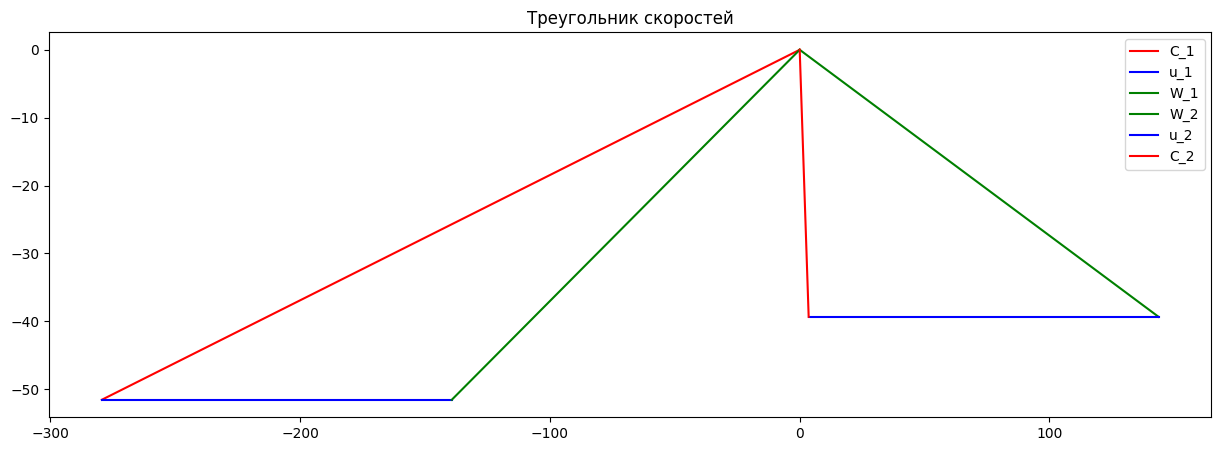

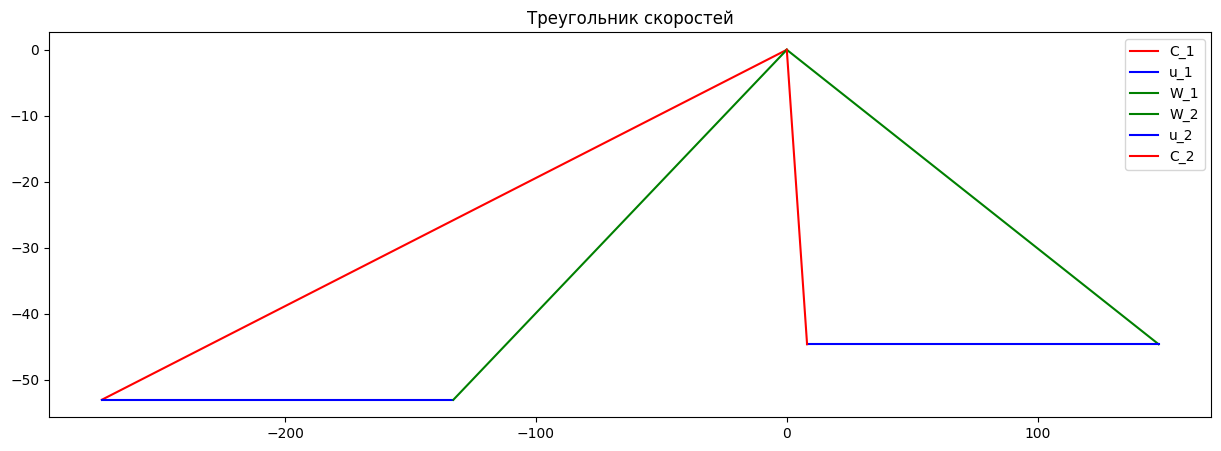

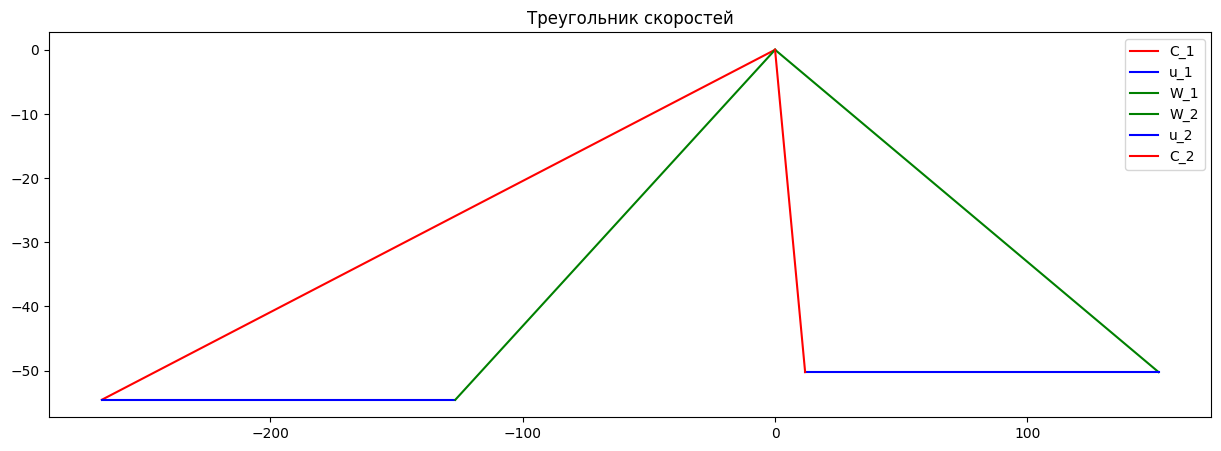

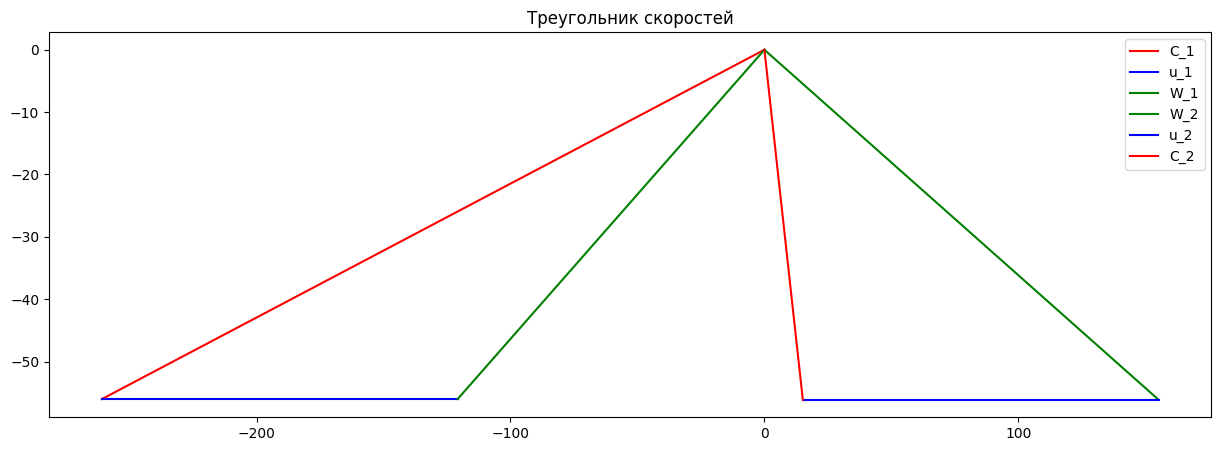

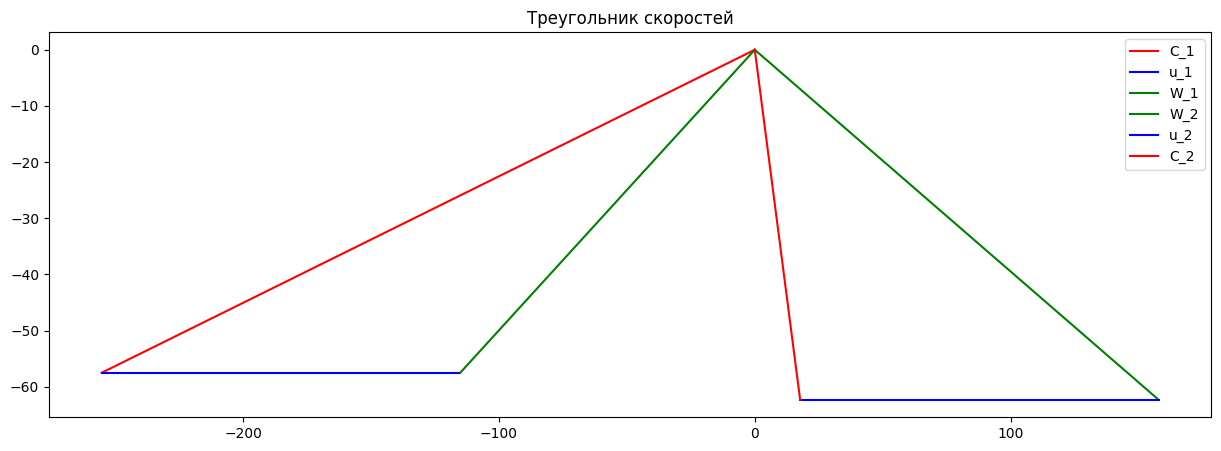

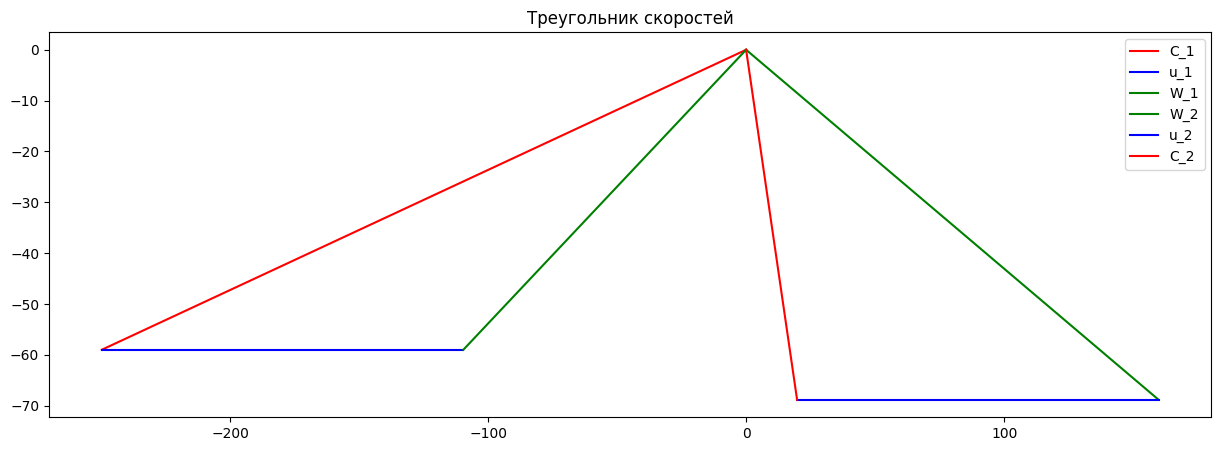

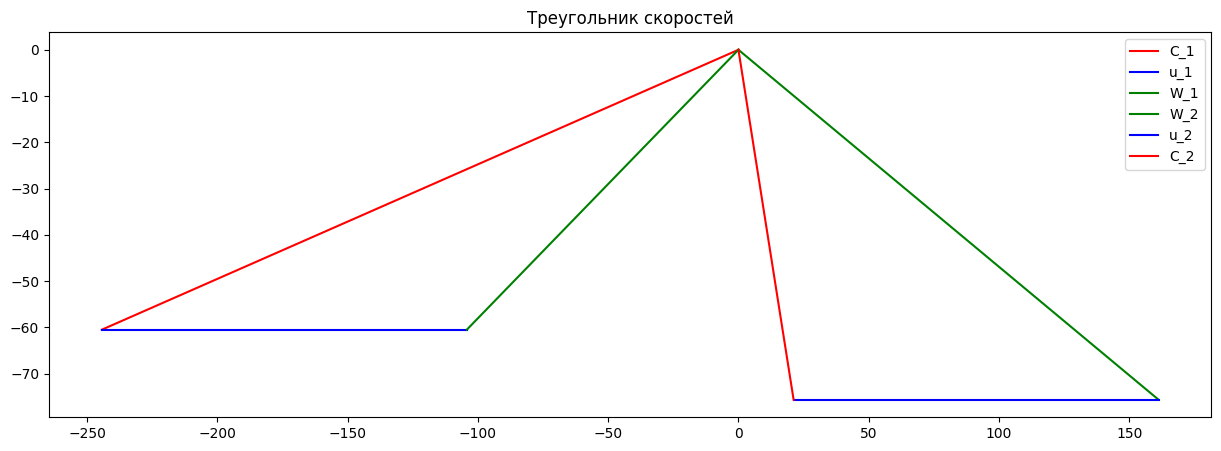

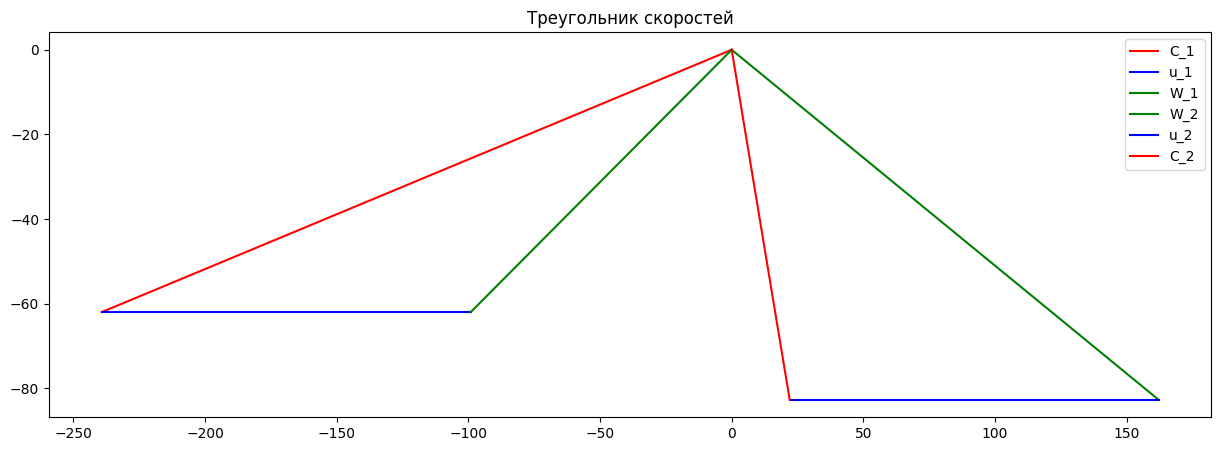

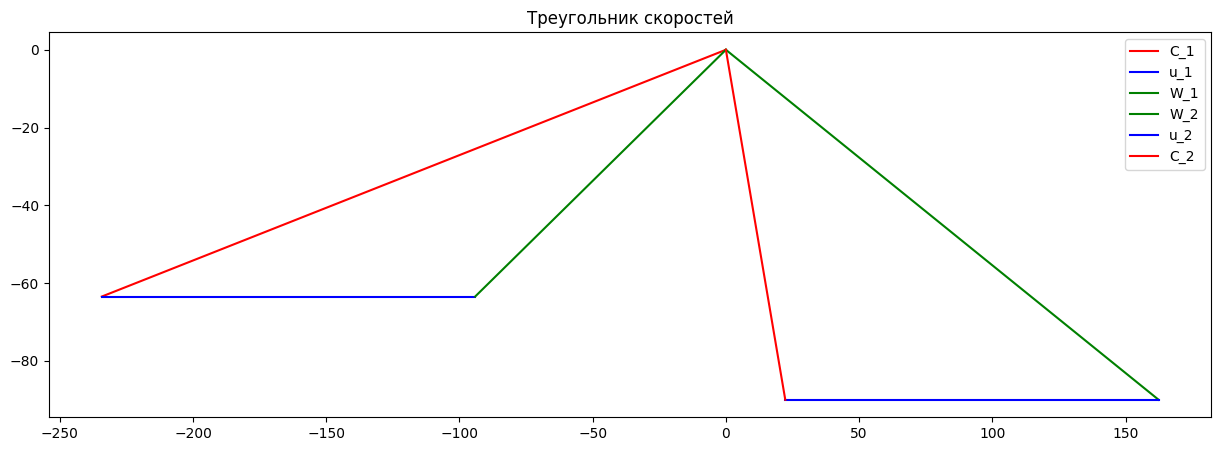

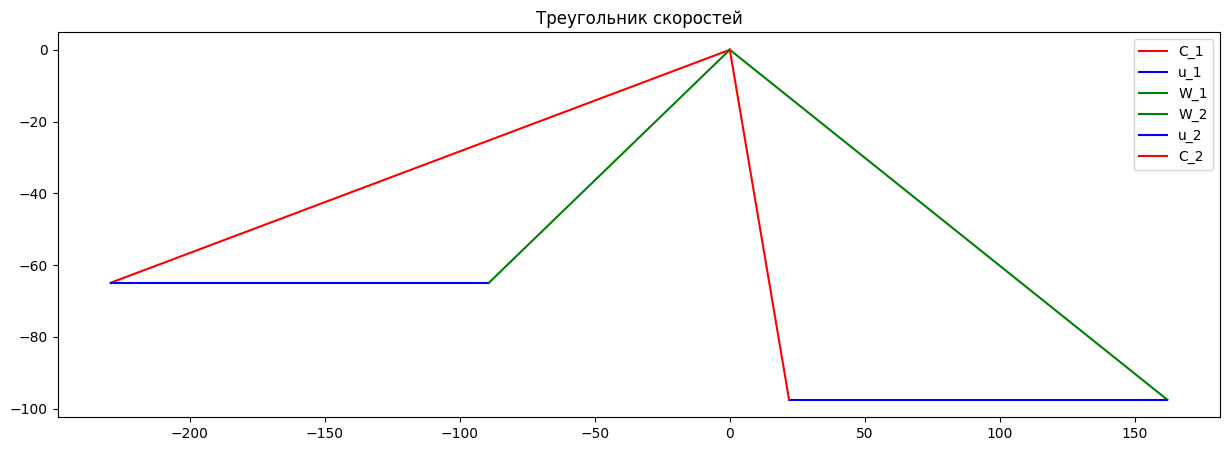

In [51]:
for diametr_value in diametr:
    R = diametr_value/2
    degree_of_reaction = degreeofreaction(R,R_avg,degree_of_reaction_avg) 
    alpha_1_deg = alpha_1(R,R_avg,alpha_1_deg_avg)
    inlet_point, outlet_point, theoretical_heat_drop, stator_heat_drop, rotor_heat_drop = heat_drop(p_0,t_0,p_2,degree_of_reaction)
    c_1,cos_alpha_1,sin_alpha_1,u,w_2,cos_beta_2,sin_beta_2 = speed (stator_heat_drop,avg_diameter)
    c1_plot,u1_plot,w1_plot,w2_plot,u2_plot,c2_plot = points(c_1,cos_alpha_1,sin_alpha_1,u,w_2,cos_beta_2,sin_beta_2)
    plot(c1_plot,u1_plot,w1_plot,w2_plot,u2_plot,c2_plot)
